In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split
pd.options.display.float_format = '{:.5f}'.format
np.set_printoptions(precision=6, suppress=True)


In [ ]:
# 분류에 대한 문제에서 불확실성은 꼭 확인하고 넘어가야할 문제
# 의료 전문가 시스템에서 false-nagative(거짓 음성)은 치료를 못하게 만들 수도 있다.
# 분류 클래스의 함수는 대부분 Decision_function 함수와 predict_proba 함수 둘 중 한개를 지원한다.

데이터셋 크기: (100, 2)
테스트 샘플의 크기: (25, 2)
정확도: [ 4.13592603 -1.70169917 -3.95106099 -3.62609552  4.28986642  3.66166081
 -7.69097179  4.11001686  1.10753937  3.40782222 -6.46255955  4.28986642
  3.90156346 -1.20031247  3.66166081 -4.17231157 -1.23010079 -3.91576223
  4.03602783  4.11001686  4.11001686  0.65709014  2.69826265 -2.65673274
 -1.86776596]
Predict: [1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0]


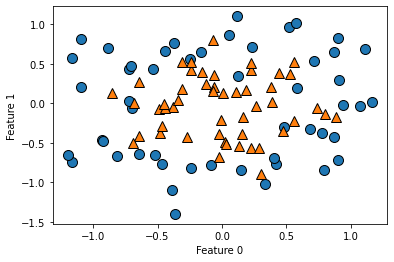

In [31]:
# 1. Decision_function 사용

# 임의의 2차원 데이터셋
from sklearn.datasets import make_circles
X, y = make_circles(noise = 0.25, factor=0.5, random_state = 1)
#print(X,y)
print("데이터셋 크기:",X.shape)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

# 그래디언트 부스팅 모델 사용
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0).fit(X_train,y_train)

print("테스트 샘플의 크기:",X_test.shape)
print("정확도:",gbrt.decision_function(X_test))
# 이 결과 양수의 값은 해당 결과가 양성(classes_ 속성의 두번째 원소 값)에 속할 확률의 대한 정수값
# 음수의 결과는 음성 즉 classes_ 속성의 첫번째 원소의 속할 확률이 더 높음을 의미
print("Predict:",gbrt.predict(X_test))

In [45]:
# 2. Predict_proba 사용
print("예측 확률:\n",gbrt.predict_proba(X_test)[:6])
# 클래스 0 과 클래스 1에 속할 확률 출력(합은 항상 1)

예측 확률:
 [[0.015736 0.984264]
 [0.845757 0.154243]
 [0.981129 0.018871]
 [0.97407  0.02593 ]
 [0.013521 0.986479]
 [0.025046 0.974954]]


In [53]:
# 다중 분류
# Decision_function, Predict_proba 함수 둘다 다중 분류에 사용할 수 있음

#3개의 클래스를 가진 iris 데이터셋 사용
from sklearn.datasets import load_iris
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)

print("Decision_function\n", gbrt.decision_function(X_test)[:6])
print("Predict_proba\n",gbrt.predict_proba(X_test)[:6])


Decision_function
 [[-8.010441 -6.985275  4.817057]
 [-8.018199  3.773127 -6.876205]
 [ 6.249993 -4.299285 -6.915353]
 [-8.010439 -6.980235  4.73732 ]
 [ 6.249431 -5.109353 -6.915354]
 [-8.010439 -6.980029  4.737131]]
Predict_proba
 [[0.000003 0.000007 0.99999 ]
 [0.000008 0.999969 0.000024]
 [0.999972 0.000026 0.000002]
 [0.000003 0.000008 0.999989]
 [0.999986 0.000012 0.000002]
 [0.000003 0.000008 0.999989]]
